In [1]:
## ReviewPowerData

In [2]:
# Go through the available two-turbine power data to understand what is available

In [12]:
# 3 Datasets of data are currently available for tuning, which are stored in pickle files:

# All simulations consist of two, NREL 5MW turbines run in a SOWFA simulation with a mean wind speed
# of approximately 8 m/s and 6% turbuelence, for approximately 1000s
# The data is the average off 200s - 1000s.
# Figures will illustrate these averages

# yawPower
## In this set, the turbines are spaced at 4D (avPowersYaw) and 7D (avPowersYawI2)
## The upstream turbine is yawed to different setpoints while the downstream turbine operates normally


# spacePower
# In this set, the two turbines are aligned in the flow, the downstream turbine is located at different distances

# offset4D/6D
# In these data sets, the downstream turbine is located at 4D or 6D and moved cross-stream an amount indicated in meters

In [1]:
# Needed Modules
%matplotlib inline
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
import cPickle as pickle
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

/home/pfleming/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# Load the data sets
yawPos,avPowersYaw, yawPosI2,avPowersYawI2 = pickle.load( open( os.path.join('data','yawPower.p'), "rb" ) )
spacing,avPowersSpace = pickle.load( open( os.path.join('data','spacePower.p'), "rb" ) )
offset4D,avPowersOffset4D = pickle.load( open( os.path.join('data','offset4DPower.p'), "rb" ) )
offset6D,avPowersOffset6D = pickle.load( open( os.path.join('data','offset6DPower.p'), "rb" ) )

In [3]:
# Define a quick plotting function
def twoTurbPlot(xData, yData, xLabel):
    fix, axarr = plt.subplots(3,1,sharex=True)
    axarr[0].plot(xData,yData[:,0]/1E6,'x--')
    axarr[0].set_ylabel('T1 Power (MW)')
    axarr[1].plot(xData,yData[:,1]/1E6,'x--')
    axarr[1].set_ylabel('T2 Power (MW)')
    axarr[2].plot(xData,np.sum(yData,axis=1)/1E6,'x--')
    axarr[2].set_ylabel('Total Power (MW)')
    axarr[2].set_xlabel(xLabel)

/home/pfleming/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


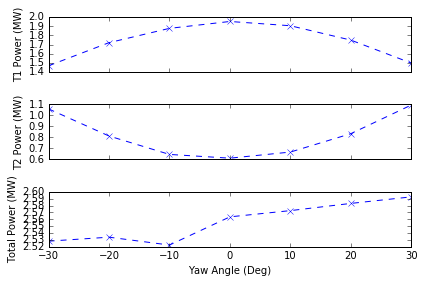

In [4]:
# Plot the yaw (4D-base) data
twoTurbPlot(yawPos, avPowersYaw, 'Yaw Angle (Deg)')

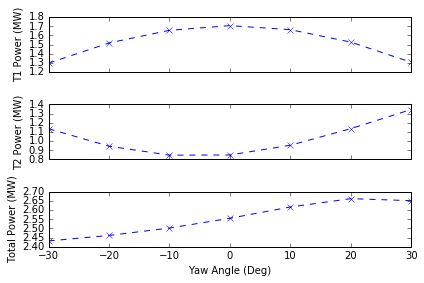

In [5]:
# Plot the yaw (7D-IW) data
twoTurbPlot(yawPosI2, avPowersYawI2, 'Yaw Angle (Deg)')

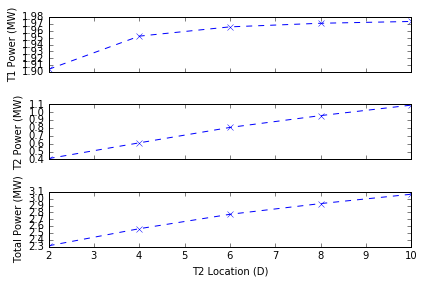

In [6]:
# Plot the spacing data
twoTurbPlot(spacing, avPowersSpace, 'T2 Location (D)')

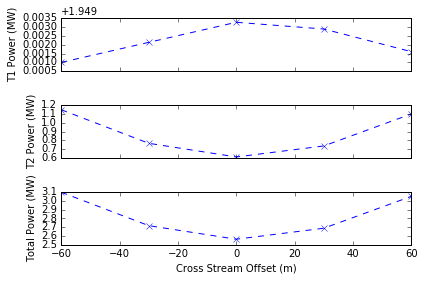

In [7]:
# Plot the offset data (4D)
twoTurbPlot(offset4D, avPowersOffset4D, 'Cross Stream Offset (m)')

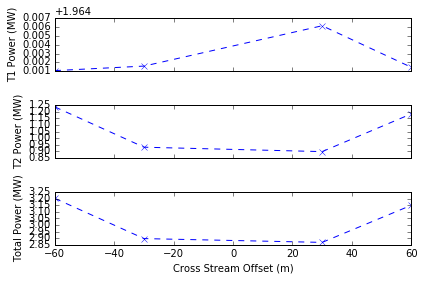

In [8]:
# Plot the offset data (6D)
twoTurbPlot(offset6D, avPowersOffset6D, 'Cross Stream Offset (m)')
